In [30]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree

In [2]:
# traemos archivo
df = pd.read_csv('./Clase 15/DataSet_Titanic.csv')
df

,Sobreviviente,Clase,Genero,Edad,HermEsp,PadHij
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
709,0,3,1,39.0,0,5
710,0,2,0,27.0,0,0
711,1,1,1,19.0,0,0
712,1,1,0,26.0,0,0


In [3]:
# Guardamos en la variable X los atributos predictores (todas las etiquetas excepto 'Sobreviviente')
X = df.drop('Sobreviviente', axis=1)

# guardar en y la etiqueta a predecir ('Sovrevieiente)
y = df.Sobreviviente

In [4]:
# visualizamos X
X.head(5)

,Clase,Genero,Edad,HermEsp,PadHij
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [5]:
# Visualizamos y
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sobreviviente, dtype: int64

In [22]:
# creamos un objeto arbol
arbol = DecisionTreeClassifier(max_depth= 3, random_state= 42)

In [23]:
# Entrenamos a la maquina
arbol.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
# Predecimos sobre nuestro set
pred_y = arbol.predict(X)

# Comparamos con las etiquetas reales
print('Precision: ', accuracy_score(pred_y, y))

Precision:  0.8151260504201681


In [25]:
# Creamos una matriz de confusion
confusion_matrix(y, pred_y)

array([[372,  52],
       [ 80, 210]], dtype=int64)

c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


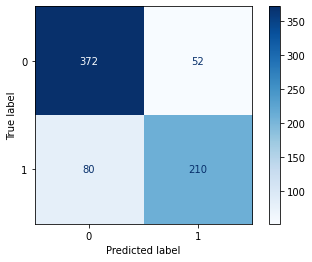

In [26]:
# Creamos un grafico para la matriz de confusion
plot_confusion_matrix(arbol, X, y, cmap= plt.cm.Blues, values_format='.0f')

c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


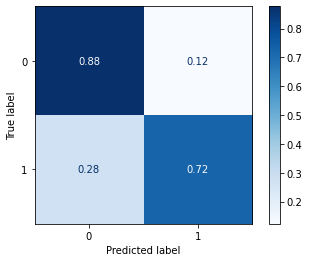

In [27]:
# Creamos un grafico para la matriz de confusion normalizada
from locale import normalize


plot_confusion_matrix(arbol, X, y, cmap= plt.cm.Blues, values_format='.2f', normalize= 'true')

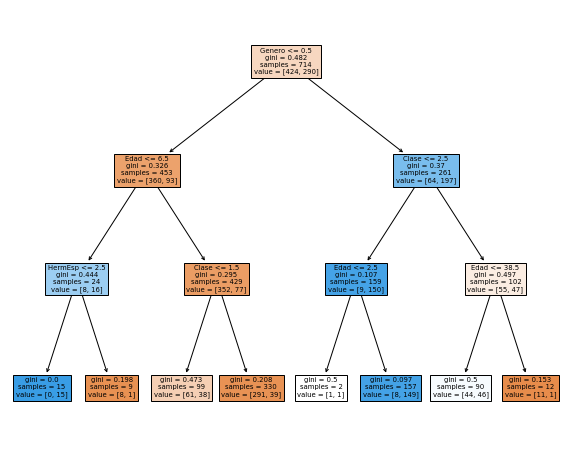

In [31]:
# mostramos un arbol graficamente

plt.figure(figsize= (10, 8))
tree.plot_tree(arbol, filled= True, feature_names= X.columns),
plt.show()

c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


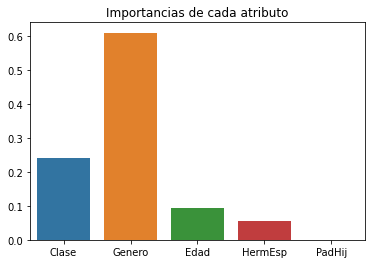

In [32]:
# graficamos las importancias de las categorias en un grafico de barra
# x (importancias) e y (columnas)

importancias = arbol.feature_importances_
columnas = X.columns

# Grafico
sns.barplot(columnas, importancias)
plt.title('Importancias de cada atributo')
plt.show()